In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Daten_Parlament_v3.xlsx',index_col='Unnamed: 0')

In [42]:
df.columns

Index(['Traktandum_GUID', 'nr', 'Sitzungs_ID', 'Link zur Sitzung',
       'Legislatur', 'Jahr', 'Bezeichnung', 'Sitzungsdatum', 'Freigabe', 'Ort',
       'Zeit', 'Bemerkungen', 'Download_Sitzung', 'Download_Protokoll',
       'Aktenplan', 'Geschaeftstyp', 'Person', 'Partei',
       'Download Traktandumsdokumente', 'Link zum Traktandum',
       'Aktenplannummer', 'Gliederung', 'Gliederungsnummer',
       'Aktenplan Ebene1', 'Aktenplan Ebene2', 'Aktenplan Ebene3',
       'Aktenplan Ebene4', 'Aktenplan Ebene5', 'Aktenplan Ebene6',
       'Dokumentendatum', 'Dokumententitel', 'Traktandentitel',
       'Vorberatende Kommission', 'Traktandenstatus', 'Traktandennummer',
       'Geschaeft_GUID', 'Legislatur start', 'Legislatur end', 'Thema',
       'Volltext'],
      dtype='object')

In [43]:
df2 = df.loc[:,['Sitzungsdatum','Thema']].set_index('Sitzungsdatum')
df2

,Thema
Sitzungsdatum,
2020-09-22,Verkehr
2020-09-22,Verkehr
2020-09-22,Energie/Umwelt/Klima
2020-10-27,Verkehr
2020-11-24,Verkehr
...,...
2016-08-23,Bildung
2016-08-23,Verkehr
2016-08-23,Verkehr


In [44]:
df2

,Thema
Sitzungsdatum,
2020-09-22,Verkehr
2020-09-22,Verkehr
2020-09-22,Energie/Umwelt/Klima
2020-10-27,Verkehr
2020-11-24,Verkehr
...,...
2016-08-23,Bildung
2016-08-23,Verkehr
2016-08-23,Verkehr


In [47]:
df2['year']=df2.index.year

In [53]:
df3 = df2.groupby('year').agg(list).iloc[-10:].map(lambda x:pd.Series(x).value_counts())

In [ ]:
df3

In [64]:
for irow,row in df3.iterrows():
    for thema in row['Thema'].index.tolist():
        print(irow,thema)
    
irow,

2014   Verkehr
2014   Finanzen und Steuern
2014   Bildung
2014   Energie/Umwelt/Klima
2014   Bauwesen
2014   Sicherheit
2014   Kultur
2014   Soziales
2015   Verkehr
2015   Energie/Umwelt/Klima
2015   Bildung
2015   Finanzen und Steuern
2015   Sicherheit
2015   Soziale
2015   Sozialhilfe
2015   Soziales
2015   'Soziales'
2015   Baumschutz
2016   Verkehr
2016   Energie/Umwelt/Klima
2016   Bildung
2016   Finanzen und Steuern
2016   Soziales
2016   Kinderfreundliche Stadt St.Gallen
2016   Soziale Dienste der Stadt St.Gaiien
2016   'Soziales'
2016   Sonstiges
2016   Sozialhilfe
2016   Kultur
2016   Soziale
2016   Asylgesetz
2017   Verkehr
2017   Energie/Umwelt/Klima
2017   Finanzen und Steuern
2017   Bildung
2017   Energie
2017   Kultur
2017   Soziale
2017   Soziale Sicherheit
2018   Verkehr
2018   Energie/Umwelt/Klima
2018   Finanzen und Steuern
2018   Kultur
2018   Soziale
2018   Bildung
2018   Sicherheit
2018   Wasserversorgung
2019   Verkehr
2019   Energie/Umwelt/Klima
2019   Bildung
20

(2023,)

In [83]:
#df2.value_counts()


AttributeError: module 'matplotlib.pyplot' has no attribute 'colormap'

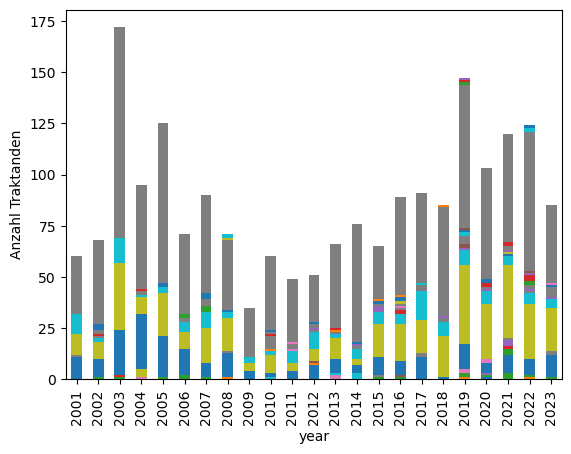

In [76]:
vc = df2.value_counts()
df4 = vc.unstack()
df4.T.plot( kind='bar', stacked=True,legend=False)
#plt.legend()
plt.ylabel('Anzahl Traktanden')
plt.savefig('Themen pro Jahr.svg',transparent=True)

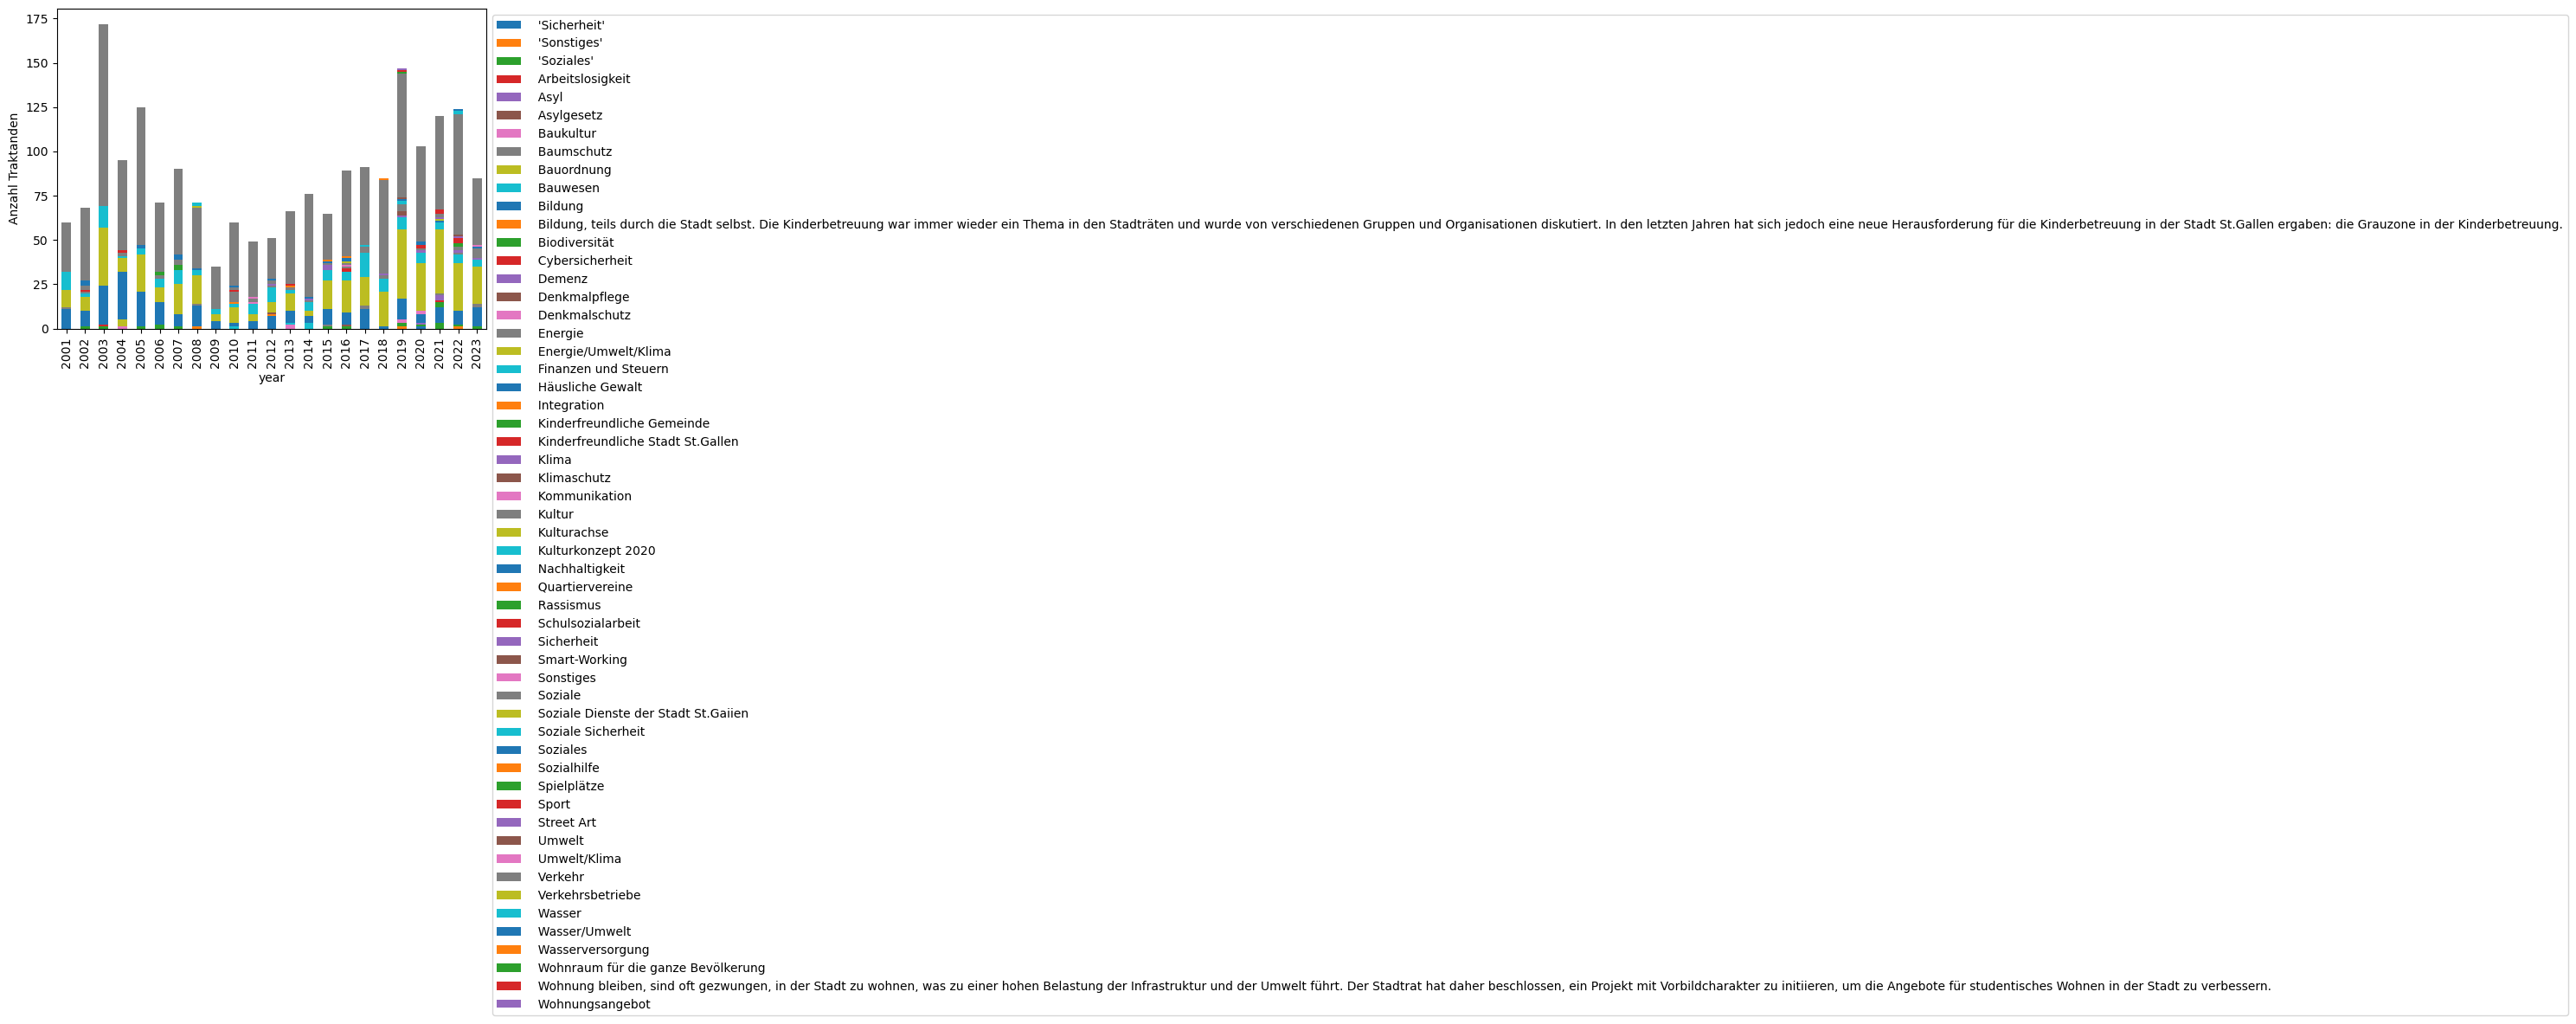

In [92]:
vc = df2.value_counts()
df4 = vc.unstack()
df4.T.plot( kind='bar', stacked=True,legend=False)
plt.legend(bbox_to_anchor=(1., 1))
plt.ylabel('Anzahl Traktanden')
plt.savefig('Themen pro Jahr_Legend.png')

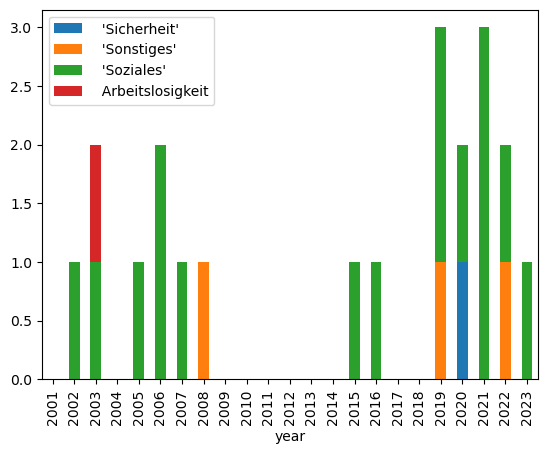

In [82]:
vc = df2.value_counts()
df4 = vc.unstack()
df4.iloc[:4,:].T.plot( kind='bar', stacked=True,legend=False)
plt.legend(bbox_to_anchor=(1.35, 1))